# Business Understanding

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this is to predict the final price of each home.

# Data Mining

In [278]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sweetviz as sv
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_absolute_error

In [279]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [280]:
train_data.shape

(1259, 81)

In [281]:
test_data.shape

(201, 80)

In [282]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [283]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1260,20,RL,65.0,9750,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1969,1969,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,602,LwQ,438,14,1054,GasA,Gd,Y,SBrkr,1054,0,0,1054,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1969.0,Unf,2,460,TA,TA,Y,180,0,0,0,80,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1,1261,60,RL,NaN,24682,Pave,NaN,IR3,Lvl,AllPub,CulDSac,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,841,841,GasA,Ex,Y,SBrkr,892,783,0,1675,0,0,2,1,3,1,TA,7,Typ,1,TA,BuiltIn,1999.0,Fin,2,502,TA,TA,Y,0,103,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2,1262,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1956,1956,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,504,Unf,0,546,1050,GasA,Gd,Y,SBrkr,1050,0,0,1050,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1956.0,Unf,1,338,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1263,50,RL,NaN,11250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,4,5,1957,1989,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,1104,1104,GasA,Ex,Y,FuseA,1104,684,0,1788,1,0,1,0,5,1,TA,8,Min2,2,TA,Attchd,1957.0,Unf,1,304,TA,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
4,1264,70,RL,60.0,13515,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,2Story,6,6,1919,1950,Gambrel,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,764,764,GasA,Ex,Y,FuseA,1060,764,0,1824,0,0,1,0,3,1,TA,8,Typ,1,Gd,Detchd,1940.0,Unf,2,520,TA,TA,N,0,0,126,0,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal


In [284]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [285]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [286]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   Alley          76 non-null     object 
 7   LotShape       1259 non-null   object 
 8   LandContour    1259 non-null   object 
 9   Utilities      1259 non-null   object 
 10  LotConfig      1259 non-null   object 
 11  LandSlope      1259 non-null   object 
 12  Neighborhood   1259 non-null   object 
 13  Condition1     1259 non-null   object 
 14  Condition2     1259 non-null   object 
 15  BldgType       1259 non-null   object 
 16  HouseStyle     1259 non-null   object 
 17  OverallQual    1259 non-null   int64  
 18  OverallC

In [287]:
#combining train and test data
data=pd.concat([train_data,test_data])

In [288]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [289]:
data.shape

(1460, 81)

In [290]:
data=data.reset_index()

In [291]:
#there may be a chance to get duplicate values
data[data.index.duplicated()]

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [292]:
#need to remove duplicates
data.drop_duplicates(inplace=True)

In [293]:
data.shape

(1460, 82)

# Data Cleaning

In [294]:
pd.set_option('display.max_rows', 82)
data.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
SalePrice         201
GarageType         81
GarageYrBlt        81
GarageQual         81
GarageCond         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
TotRmsAbvGrd        0
PoolArea            0
Functional          0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
BsmtFullBath        0
KitchenQual         0
Fireplaces          0
ScreenPorch         0
SaleCondition       0
SaleType            0
YrSold              0
LowQualFinSF        0
GarageCars          0
GarageArea          0
MoSold              0
MiscVal             0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
GrLivArea 

In [295]:
#converting these null values to percentage
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
SalePrice        13.767123
GarageType        5.547945
GarageYrBlt       5.547945
GarageQual        5.547945
GarageCond        5.547945
GarageFinish      5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
TotRmsAbvGrd      0.000000
PoolArea          0.000000
Functional        0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
KitchenQual       0.000000
Fireplaces        0.000000
ScreenPorch       0.000000
SaleCondition     0.000000
SaleType          0.000000
YrSold            0.000000
LowQualFinSF      0.000000
GarageCars        0.000000
G

In [296]:
data.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)

In [297]:
data.shape

(1460, 78)

In [298]:
((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False).head(20)

FireplaceQu     47.260274
LotFrontage     17.739726
SalePrice       13.767123
GarageCond       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
MoSold           0.000000
PavedDrive       0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
dtype: float64

In [299]:
data.GarageQual.mode()

0    TA
Name: GarageQual, dtype: object

In [300]:
data.GarageQual=data.GarageQual.fillna('TA')

In [301]:
data.GarageQual.isnull().sum()

0

In [302]:
data.GarageCond.mode()

0    TA
Name: GarageCond, dtype: object

In [303]:
data.GarageCond=data.GarageCond.fillna('TA')

In [304]:
data.GarageCond.isnull().sum()

0

In [305]:
data.GarageYrBlt.mode()

0    2005.0
Name: GarageYrBlt, dtype: float64

In [306]:
data.GarageYrBlt=data.GarageYrBlt.fillna(2005.0)

In [307]:
data.GarageYrBlt.isnull().sum()

0

In [308]:
data.GarageFinish.mode()

0    Unf
Name: GarageFinish, dtype: object

In [309]:
data.GarageFinish=data.GarageFinish.fillna('Unf')

In [310]:
data.GarageFinish.isnull().sum()

0

In [311]:
data.GarageType.mode()

0    Attchd
Name: GarageType, dtype: object

In [312]:
data.GarageType=data.GarageType.fillna('Attchd')

In [313]:
data.BsmtFinType2.mode()

0    Unf
Name: BsmtFinType2, dtype: object

In [314]:
data.BsmtFinType2=data.BsmtFinType2.fillna('Unf')

In [315]:
data.BsmtExposure.mode()

0    No
Name: BsmtExposure, dtype: object

In [316]:
data.BsmtExposure=data.BsmtExposure.fillna('No')

In [317]:
data.BsmtFinType1.mode()

0    Unf
Name: BsmtFinType1, dtype: object

In [318]:
data.BsmtFinType1=data.BsmtFinType1.fillna('Unf')

In [319]:
data.BsmtQual.mode()

0    TA
Name: BsmtQual, dtype: object

In [320]:
data.BsmtQual=data.BsmtQual.fillna('TA')

In [321]:
data.BsmtCond.mode()

0    TA
Name: BsmtCond, dtype: object

In [322]:
data.BsmtCond=data.BsmtCond.fillna('TA')

In [323]:
data.MasVnrType.mode()

0    None
Name: MasVnrType, dtype: object

In [324]:
data.MasVnrType=data.MasVnrType.fillna('None')

In [325]:
data.MasVnrArea.mode()

0    0.0
Name: MasVnrArea, dtype: float64

In [326]:
data.MasVnrArea=data.MasVnrArea.fillna(0.0)

In [327]:
data.Electrical.mode()

0    SBrkr
Name: Electrical, dtype: object

In [328]:
data.Electrical=data.Electrical.fillna('SBrkr')

In [329]:
data.isnull().sum().sort_values(ascending=False).head()

FireplaceQu    690
LotFrontage    259
SalePrice      201
HalfBath         0
Fireplaces       0
dtype: int64

In [330]:
le=LabelEncoder()
data['FireplaceQu']=le.fit_transform(data['FireplaceQu'])

In [331]:
def fillingNullValues(col, typedata):
    for dataset in train_data:
        mean=data[col].mean()
        std=data[col].std()
        sizeofnull=data[col].isnull().sum()
        randcol=np.random.randint(mean-std,mean+std,size=sizeofnull)
        col_copied=data[col].copy()
        col_copied[np.isnan(col_copied)]=randcol
        data[col]=col_copied
        data[col]=data[col].astype(typedata)

In [332]:
data.FireplaceQu.dtype

dtype('int32')

In [333]:
fillingNullValues("FireplaceQu", int)

In [334]:
data.FireplaceQu.isnull().sum()

0

In [335]:
data.LotFrontage.dtype

dtype('float64')

In [336]:
fillingNullValues("LotFrontage", float)

In [337]:
data.LotFrontage.isnull().sum()

0

In [338]:
data.SalePrice.dtype

dtype('float64')

In [339]:
fillingNullValues("SalePrice", float)

In [340]:
data.SalePrice.isnull().sum()

0

In [341]:
data.isnull().sum().sort_values(ascending=False)

index            0
FullBath         0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
BsmtHalfBath     0
GarageType       0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
CentralAir       0
FireplaceQu      0
GarageYrBlt      0
Id               0
3SsnPorch        0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
EnclosedPorch    0
GarageFinish     0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
GarageCars       0
HeatingQC        0
Heating          0
TotalBsmtSF      0
LotConfig        0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
Utilities        0
BsmtUnfSF        0
LandContour      0
LotShape    

# Exploratory Data Analysis

In [342]:
#Univariate

In [343]:
data[["SalePrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,181088.019178,76909.646417,34900.0,130000.0,166000.0,215000.0,755000.0


In [344]:
report=sv.analyze(data)

                                             |                                             | [  0%]   00:00 ->…

In [345]:
report.show_html("report.html")

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


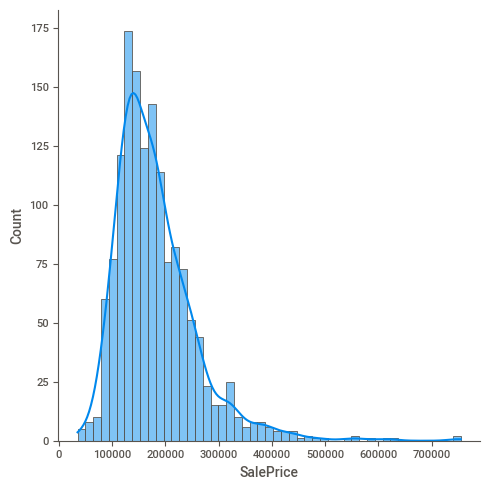

In [346]:
sns.displot(data['SalePrice'],kde=True)

In [347]:
data.SalePrice.skew()

1.9459036028063241

<AxesSubplot:xlabel='SalePrice'>

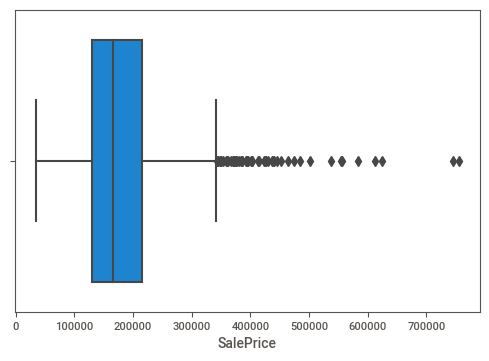

In [348]:
sns.boxplot(data['SalePrice'])

In [349]:
def removeOutliers(col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    uf=q3+1.5*iqr
    lf=q1-1.5*iqr
    
    ind1=data[data[col]>uf].index
    ind2=data[data[col]<lf].index
    
    data.drop(ind1,axis=0,inplace=True)
    data.drop(ind2,axis=0,inplace=True)

In [350]:
removeOutliers('SalePrice')

<AxesSubplot:xlabel='SalePrice'>

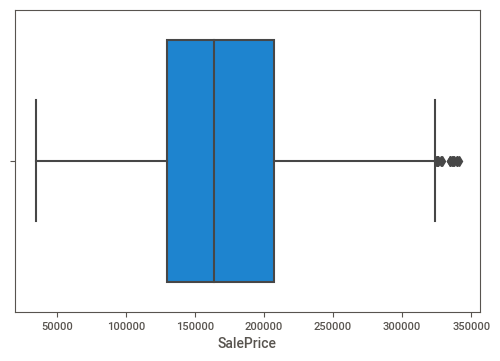

In [351]:
sns.boxplot(data['SalePrice'])

In [352]:
data.shape

(1406, 78)

In [353]:
data.SalePrice.skew()

0.6025363643304761

In [354]:
removeOutliers('SalePrice')

In [355]:
data.SalePrice.skew()

0.5085814813144562

<AxesSubplot:xlabel='SalePrice'>

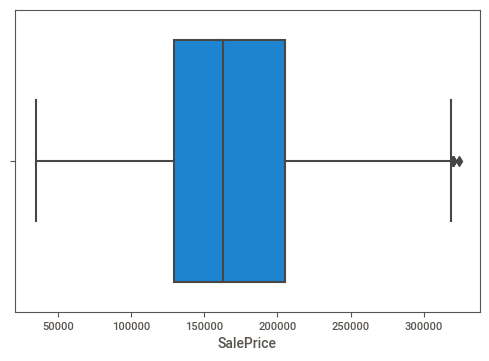

In [356]:
sns.boxplot(data['SalePrice'])

In [357]:
removeOutliers('SalePrice')

<AxesSubplot:xlabel='SalePrice'>

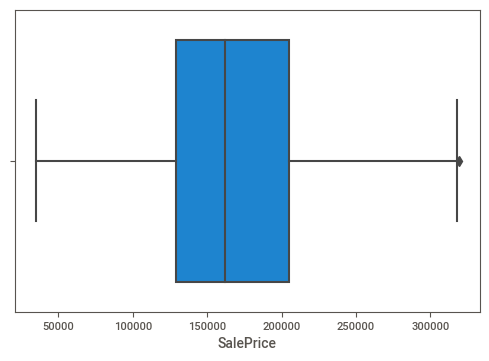

In [358]:
sns.boxplot(data['SalePrice'])

In [359]:
data.shape

(1384, 78)

In [360]:
removeOutliers('SalePrice')

In [361]:
data.shape

(1383, 78)

In [362]:
data.SalePrice.skew()

0.47202071315589084

<AxesSubplot:xlabel='SalePrice'>

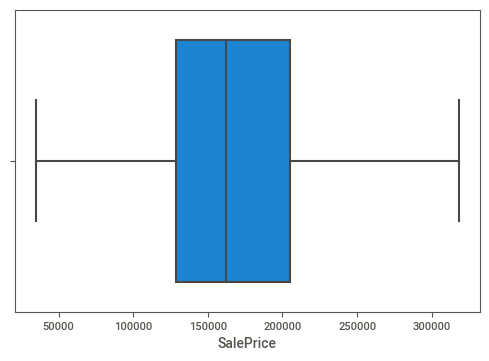

In [363]:
sns.boxplot(data['SalePrice'])

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

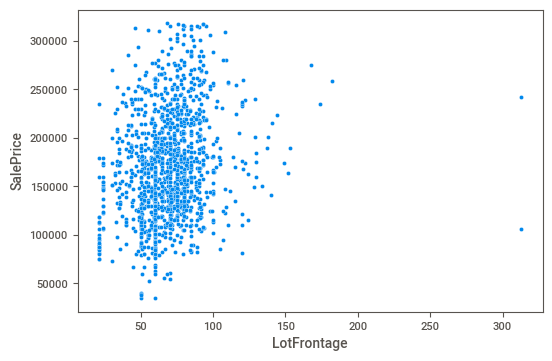

In [364]:
#multivariate Analysis
sns.scatterplot(x='LotFrontage',y='SalePrice',data=data)

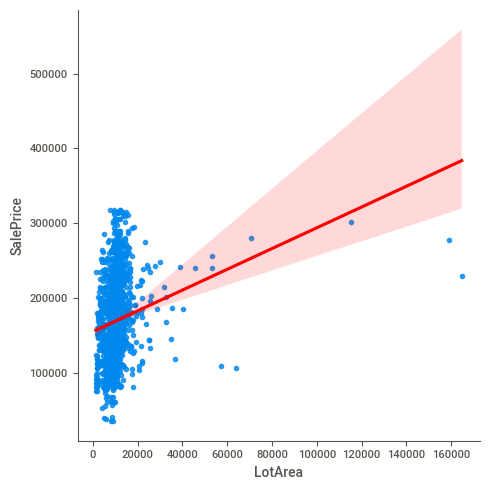

In [365]:
sns.lmplot(x='LotArea',y='SalePrice',data=data,line_kws={'color': 'red'})

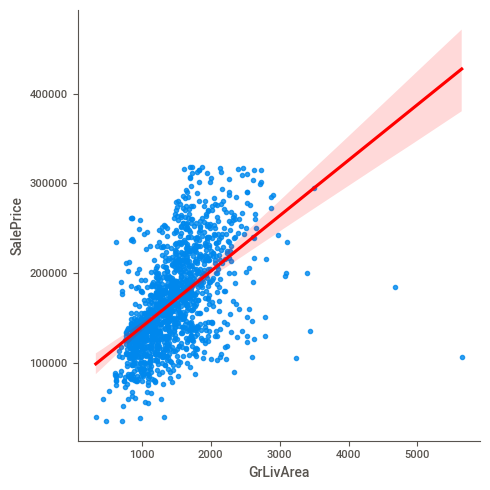

In [366]:
sns.lmplot(x="GrLivArea",y="SalePrice",data=data,line_kws={'color':'red'})

# Data Preprocessing


In [367]:
categorical_features=[i for i in data.columns if data[i].dtypes == 'object']
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [368]:
for i in range(1,len(categorical_features)):
    le=LabelEncoder()
    data[categorical_features[i]]=le.fit_transform(data[categorical_features[i]])
    
data.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,12,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500.0
1,1,2,20,RL,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500.0
2,2,3,60,RL,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,12,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500.0
3,3,4,70,RL,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,14,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000.0
4,4,5,60,RL,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,12,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000.0


In [369]:
pd.set_option('display.max_columns', 82)
data.corr()

,index,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
index,1.000000,0.404448,0.011884,-0.004259,-0.031183,-0.019901,0.015707,0.003872,0.027101,0.042674,-0.003437,0.040613,0.004511,0.011343,0.009978,0.035364,-0.039085,0.003536,-0.001580,-0.037704,-0.002566,0.005104,-0.031514,-0.049549,0.030256,-0.092252,0.030973,0.029374,0.023973,0.060911,0.017086,-0.014148,0.002421,-0.028200,0.010385,-0.017593,-0.017202,-0.054306,0.004956,0.040015,0.009056,0.030174,-0.032406,-0.027793,-0.018088,-0.050477,-0.025958,0.007037,-0.036032,-0.005423,0.008217,-0.012770,0.011482,-0.018879,0.002193,-0.048402,0.033539,-0.019848,-0.014395,0.003101,-0.015023,-0.007526,0.035127,0.019557,0.024269,-0.026079,-0.025973,-0.008825,-0.047332,-0.018403,-0.020410,0.007701,0.021202,-0.042764,-0.007739,-0.047058,-0.065007
Id,0.404448,1.000000,0.005395,0.008021,-0.010907,0.010328,0.025607,-0.024742,0.013095,0.052580,0.003095,0.006913,-0.009571,0.004347,0.014892,0.024239,0.004167,0.006675,0.001375,-0.006821,0.050186,-0.004602,-0.027425,-0.032612,0.057430,-0.034150,-0.028288,0.035724,0.018531,0.022917,0.012498,-0.037523,0.015152,0.007784,0.048972,-0.006326,0.005563,0.011378,0.043186,-0.009921,0.015095,0.044294,0.039950,0.017941,-0.038498,0.041941,0.016579,-0.028282,0.021803,0.012954,0.043835,-0.001033,-0.041552,0.059235,0.003928,0.002468,-0.025331,-0.002959,0.012580,-0.028630,0.047239,0.045551,-0.006326,-0.014850,0.011661,-0.011603,0.014967,0.001582,-0.049148,0.006303,0.050066,-0.008048,0.025703,-0.008157,0.011849,0.010292,0.034296
MSSubClass,0.011884,0.005395,1.000000,-0.347605,-0.149842,-0.024609,0.120571,-0.002819,-0.023396,0.083499,-0.030008,0.006944,-0.016121,-0.050904,0.748036,0.399802,0.061072,-0.070290,0.043984,0.052956,-0.109673,-0.033850,-0.087098,-0.135195,-0.023810,0.045310,-0.043862,0.001342,0.068538,-0.078845,-0.014380,-0.080176,0.014423,-0.055624,0.041464,-0.065230,-0.141789,-0.232400,0.049593,0.013628,-0.100470,0.055869,-0.247970,0.318231,0.044519,0.095071,0.012463,-0.009474,0.148688,0.181536,-0.031111,0.283321,-0.011295,0.056143,0.006528,-0.039966,0.041074,0.083497,0.114399,-0.002925,-0.020207,-0.084000,0.013148,0.004903,-0.057779,0.000942,-0.001024,-0.013557,-0.052245,-0.032688,0.007573,-0.008691,-0.014838,-0.025431,0.015127,-0.012158,-0.045520
LotFrontage,-0.004259,0.008021,-0.347605,1.000000,0.283895,-0.040674,-0.132554,-0.083858,-0.021848,-0.181430,0.057510,0.068913,-0.020190,-0.021250,-0.386884,0.011988,0.169358,-0.033319,0.079744,0.037206,0.123045,0.095188,0.058342,0.084985,-0.037018,0.127972,-0.139279,0.038574,0.056779,-0.090863,0.048970,-0.090359,-0.025498,0.192060,-0.040551,0.048968,0.091865,0.315040,-0.015827,-0.038566,0.049594,0.050035,0.374723,0.020512,0.033102,0.303710,0.059212,-0.004461,0.131048,0.022176,0.211544,-0.001706,-0.121807,0.258231,0.025768,0.194112,-0.157447,-0.192898,-0.004557,-0.166338,0.215248,0.276104,0.047889,0.026560,0.083733,0.041332,0.109352,0.012998,0.056566,0.042679,0.166801,-0.014042,0.020721,0.014855,-0.029378,0.047286,0.228252
LotArea,-0.031183,-0.010907,-0.149842,0.283895,1.000000,-0.245051,-0.186181,-0.158319,0.013669,-0.150046,0.419429,-0.005074,0.029004,0.017101,-0.233873,-0.047666,0.069153,0.006152,-0.000788,0.010857,0.033819,0.151761,0.039160,0.010459,-0.00

<AxesSubplot:>

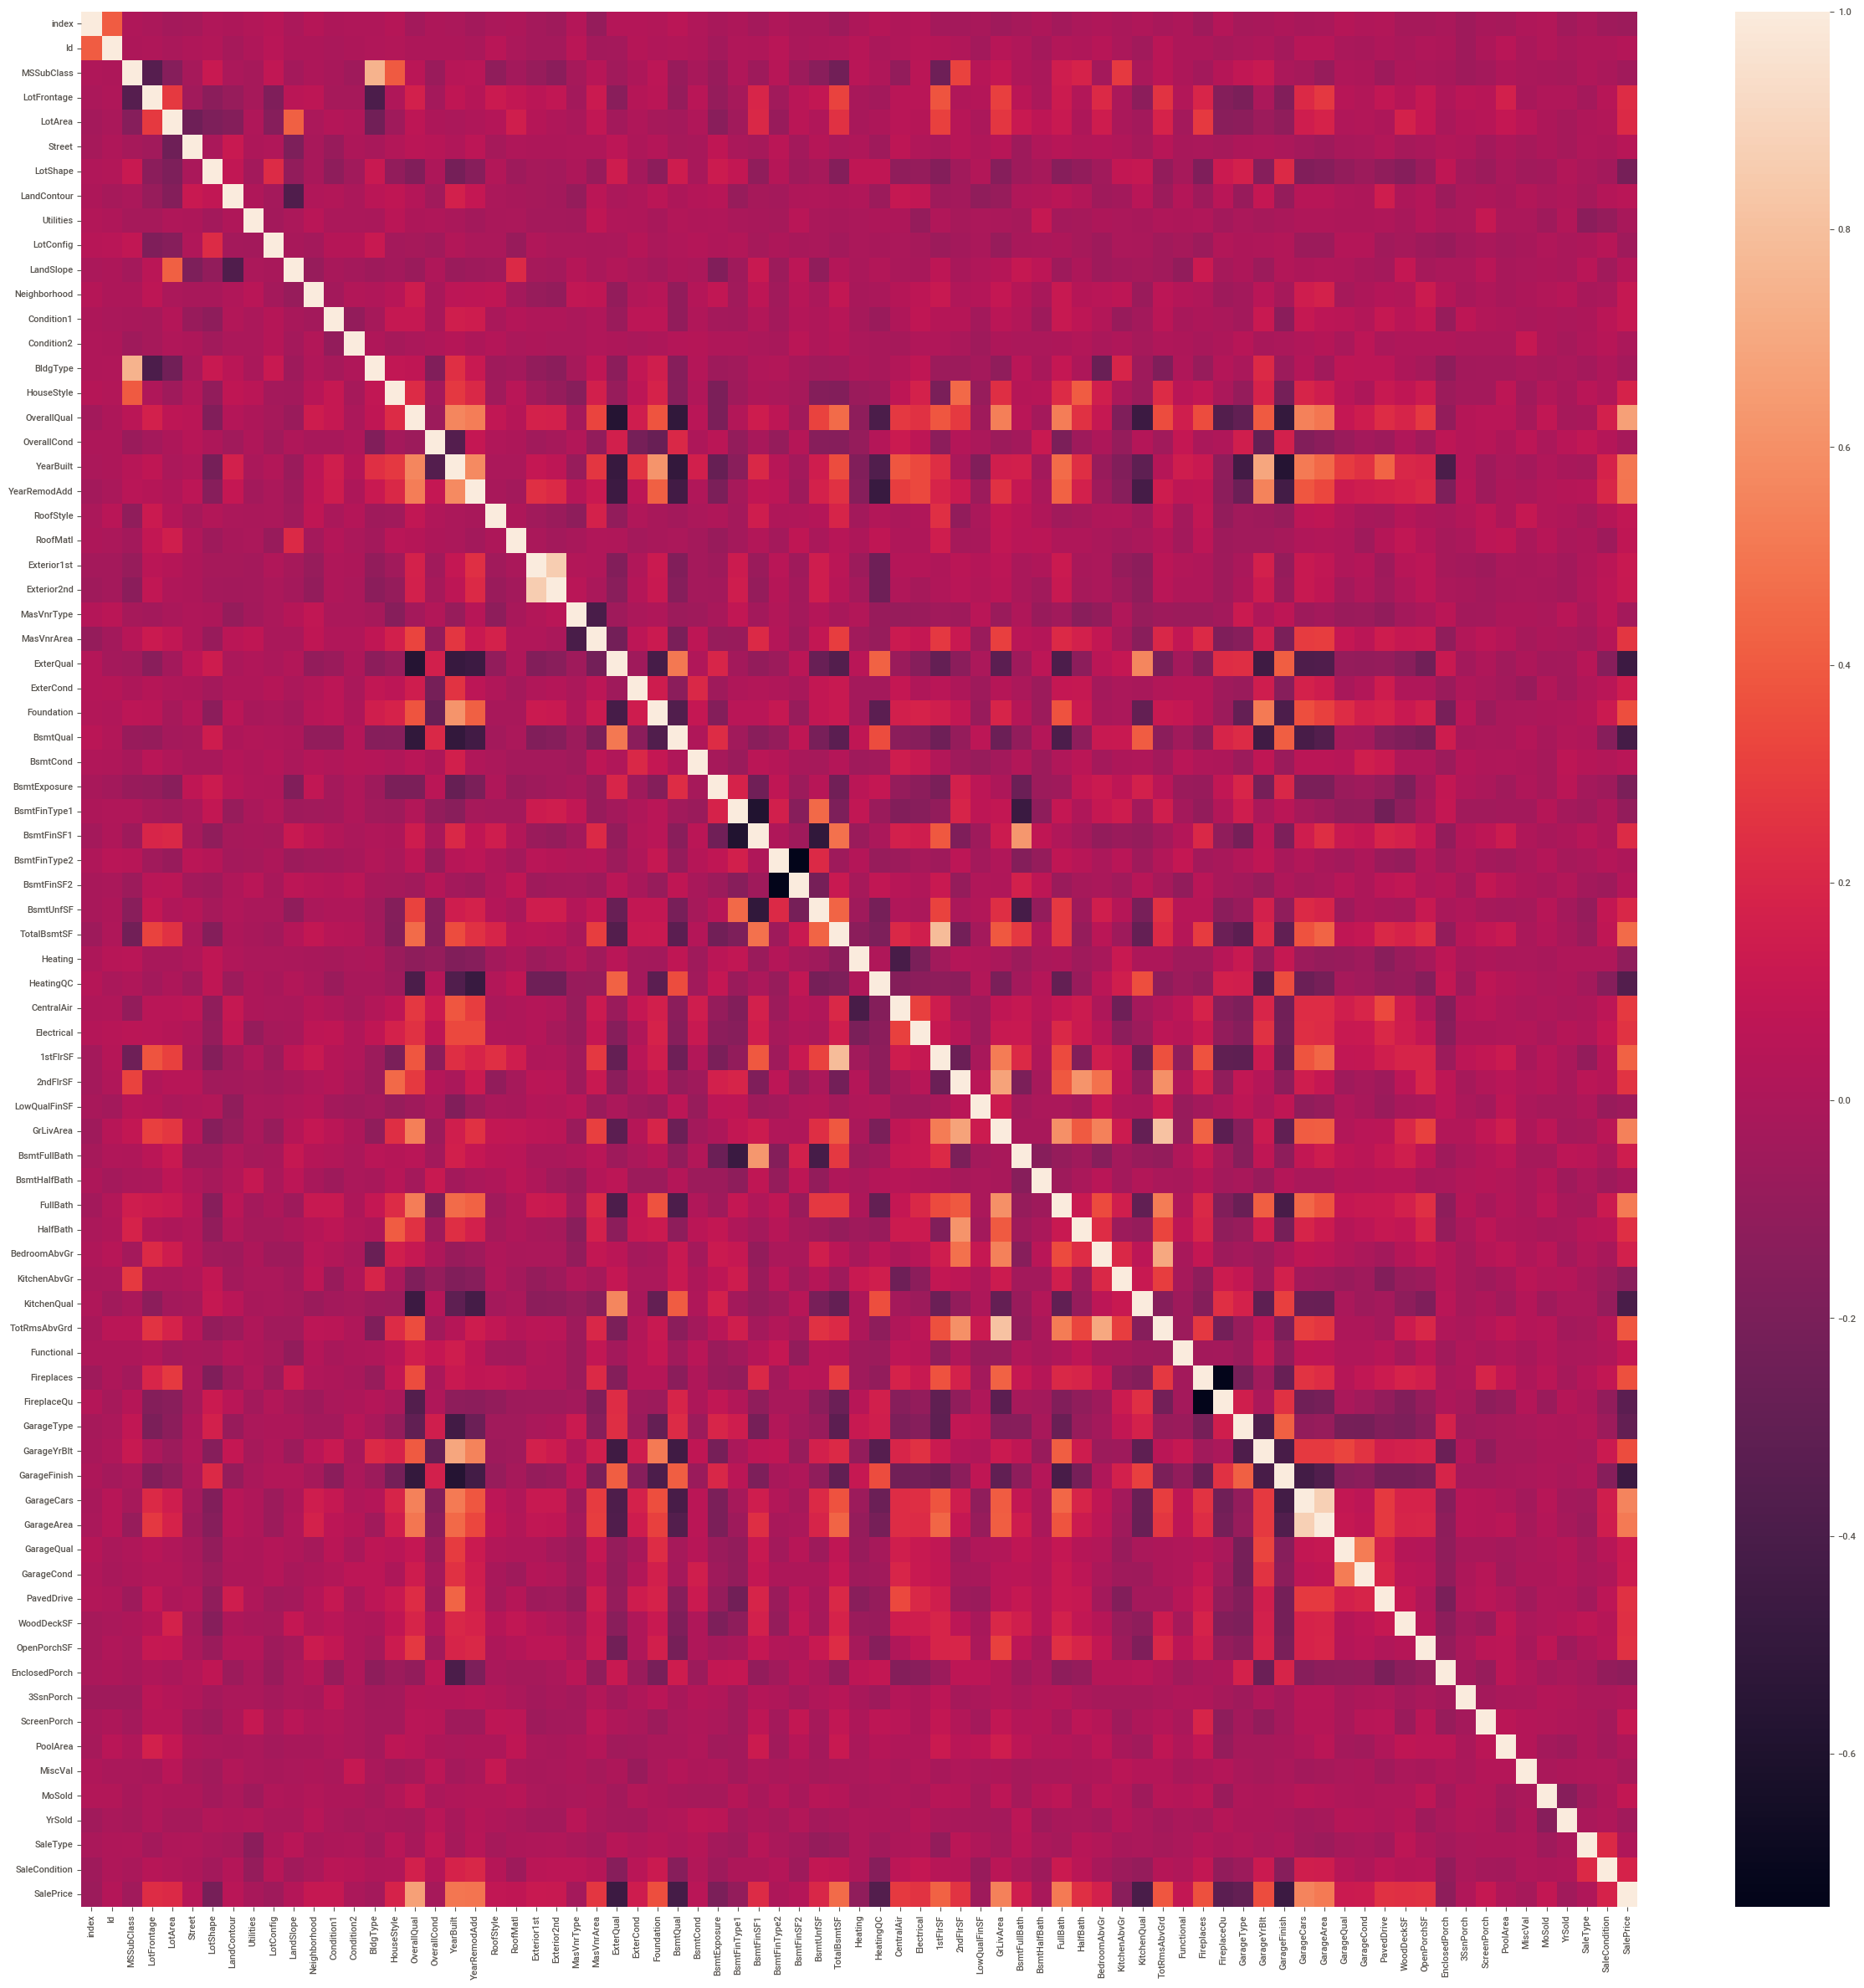

In [370]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr())

In [371]:
categorical_features=[i for i in data.columns if data[i].dtypes == 'object']
categorical_features


['MSZoning']

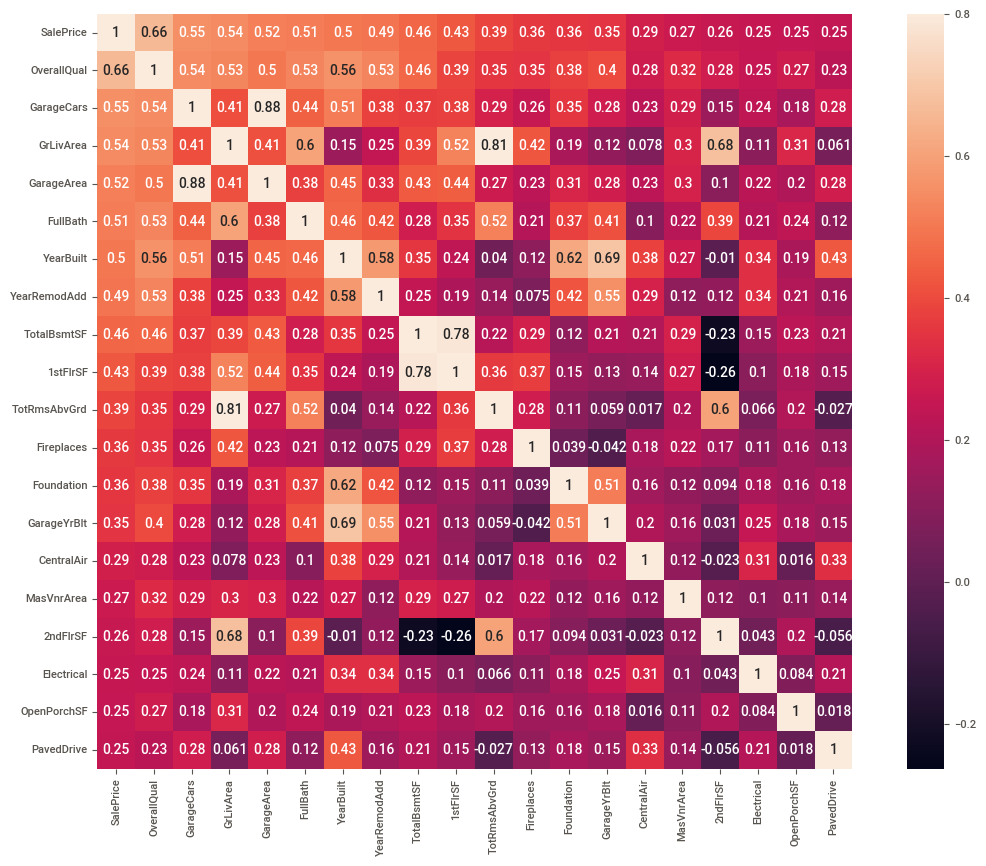

In [372]:
k = 20 #number of variables for heatmap
cols =data.corr().nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(data[cols].corr(), vmax=.8, square=True,annot=True, fmt='.2g');

In [373]:
data.drop('MSZoning',inplace=True,axis=1)

# Feature Engineering

In [374]:
x=data.loc[:,['OverallQual','GrLivArea','GarageArea','YearBuilt','1stFlrSF','TotRmsAbvGrd','Fireplaces','Foundation','MasVnrArea','CentralAir','PavedDrive']]
y=data.loc[:,'SalePrice']

In [375]:
x.shape

(1383, 11)

In [376]:
y.shape

(1383,)

In [377]:
x.head()

,OverallQual,GrLivArea,GarageArea,YearBuilt,1stFlrSF,TotRmsAbvGrd,Fireplaces,Foundation,MasVnrArea,CentralAir,PavedDrive
0,7,1710,548,2003,856,8,0,2,196.0,1,2
1,6,1262,460,1976,1262,6,1,1,0.0,1,2
2,7,1786,608,2001,920,6,1,2,162.0,1,2
3,7,1717,642,1915,961,7,1,0,0.0,1,2
4,8,2198,836,2000,1145,9,1,2,350.0,1,2


In [378]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

# Model Prediction

In [379]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=34)

In [380]:
x_train.shape

(1106, 11)

In [381]:
x_test.shape

(277, 11)

In [382]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [383]:
x_train

array([[ 0.79743384, -0.35672568, -0.10116777, ..., -0.58179565,
         0.2638797 ,  0.29858032],
       [-0.7539502 , -0.02029597,  0.111563  , ..., -0.58179565,
         0.2638797 ,  0.29858032],
       [-0.7539502 , -1.26633196,  0.80777279, ..., -0.58179565,
         0.2638797 ,  0.29858032],
       ...,
       [-0.7539502 ,  0.20399051,  2.60147995, ...,  0.9622549 ,
         0.2638797 ,  0.29858032],
       [ 0.79743384,  1.91936673,  1.82307873, ...,  3.4764611 ,
         0.2638797 ,  0.29858032],
       [-0.7539502 , -0.54570781, -0.65233385, ..., -0.58179565,
         0.2638797 ,  0.29858032]])

In [384]:
x_test

array([[-0.7539502 , -0.92574879, -0.46861182, ..., -0.58179565,
         0.2638797 ,  0.29858032],
       [ 0.02174182, -1.49892534, -0.93275168, ..., -0.58179565,
         0.2638797 ,  0.29858032],
       [ 0.79743384, -0.98597386,  0.63372034, ...,  0.85294159,
         0.2638797 ,  0.29858032],
       ...,
       [ 1.57312585,  0.35766828,  0.12123258, ...,  0.60698663,
         0.2638797 ,  0.29858032],
       [ 0.79743384,  1.80722349,  2.08899219, ...,  5.71055194,
         0.2638797 ,  0.29858032],
       [ 1.57312585,  0.48434861,  0.2614415 , ...,  3.87955395,
         0.2638797 ,  0.29858032]])

In [385]:
#Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [386]:
y_pred_lr=lr.predict(x_test)

In [387]:
y_pred_lr

array([130836.51447335, 142579.02593384, 165629.74481016, 234520.25336136,
       119539.53537838, 135595.04016588, 122573.9042081 , 168358.25321453,
       188992.23530114, 118489.0545724 , 115730.56390729, 131712.44886326,
       154262.22877744, 154561.7571804 , 142888.94510822, 211880.80488836,
       140876.02203824, 135733.25351306, 191323.88356824, 121298.56855878,
       233215.47798401, 144959.29421443, 211584.51474397, 167160.99855539,
       152227.54730949, 168944.05228343, 196900.30962381, 137405.48644293,
       122840.65494233, 174267.80052348, 215690.89708997, 139922.72053592,
       137952.98749908, 161996.03694967, 176285.2208414 , 126791.0222526 ,
       192909.50006337, 163738.02268743, 166140.13287555, 196247.11550977,
       163255.66883913, 113377.48119613, 133644.38547358, 117711.87344338,
       164544.7080494 , 223798.67697907, 200182.04335823, 184913.94330768,
       184824.43065157, 170559.59820935, 196300.71521427, 203904.90681282,
       212245.51603153, 1

In [388]:
y_test

413     115000.0
372     125000.0
980     178400.0
478     297000.0
52      110000.0
          ...   
747     265979.0
149     115000.0
1405    164202.0
517     265000.0
169     228000.0
Name: SalePrice, Length: 277, dtype: float64

In [389]:
mean_absolute_error(y_test,y_pred_lr)

24812.157686811406

In [390]:
r2_score(y_test,y_pred_lr)

0.5266460723326608

In [391]:
#knn Regressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [392]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([133780. , 151431.6, 163863. , 272100. , 112700. , 163427.2,
       124681. , 191614.2, 176480. , 114563.6, 129374.8, 127009.6,
       132850. , 159677.4, 120376.6, 218000. , 125020.2, 122490. ,
       180860. , 130537.6, 236046. , 137480. , 243505.6, 115660. ,
       155747.8, 156146.2, 180248.8, 121580. , 107775.2, 168929.6,
       218494.6, 152942. , 138377.4, 120715.6, 182029.8, 137463. ,
       173900. , 163200. , 117952.8, 205529. , 150380. , 107330.8,
       133903.2, 106600. , 152200. , 245706. , 194560. , 163703.2,
       178420. , 156849. , 209200. , 242180. , 227700. , 174125. ,
       161722.2, 121780. , 207368.8, 120480. , 146700. , 171472.8,
        98340. , 134281. , 198946.4, 149718.2, 132580. ,  96308.2,
       139600. , 154601.6, 160362. , 139980. , 177014.4, 233796.2,
       173138.2, 152032.2, 216637.4, 162200. , 118673.6, 241846.4,
       189700. , 137900. , 113580. ,  79480. , 155318. , 137200. ,
       123274.8, 171165.2, 199722.4, 165393.4, 180728. , 13998

In [393]:
r2_score(y_test,y_pred_knn)

0.4601449983343252

In [394]:
mean_absolute_error(y_test,y_pred_knn)

24724.941516245486

In [395]:
#Decision Tree
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [396]:
y_pred_dt=dt.predict(x_test)
y_pred_dt

array([109500., 113000., 170000., 318000., 145000., 140000., 101585.,
       172785., 178000., 142812.,  80000., 130000., 161750., 245443.,
       148000., 200624., 119900., 143000., 118845.,  91500., 239500.,
       137500., 221500., 122000., 156000., 200100., 118845., 121600.,
        96500., 159500., 240000., 154900., 245984., 197900., 211749.,
       134900., 188700., 140000., 118086., 190000., 160000.,  55993.,
       121600., 147000., 125523., 230000., 178000., 184000., 187500.,
       175000., 176000., 169238., 239900., 173000., 222611., 144000.,
       275000., 129000., 168000., 176485., 118000.,  89471., 182000.,
       152000., 140000.,  79000., 155000., 181684., 139500., 135500.,
       158000., 226000., 143000., 157000., 214900., 148000., 118000.,
       306000., 134432., 148000.,  81000.,  67000., 140000., 145000.,
        75500., 239799., 205950., 156000., 174000., 179900., 184750.,
       154900., 157000., 219383., 175000., 139037., 174000., 199998.,
        68500., 1600

In [397]:
r2_score(y_test,y_pred_dt)

0.1966438771580662

In [398]:
mean_absolute_error(y_test,y_pred_dt)

33287.25992779784

In [399]:
#Random Forest Classifier
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [400]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([113476.39      , 142527.84      , 163092.32      , 295263.95      ,
       145756.2       , 135163.07      , 112661.04      , 166894.935     ,
       177975.67      , 126881.72      , 115375.72      , 132261.63      ,
       129970.09      , 170922.91      , 131019.14      , 193150.6       ,
       129731.38      , 122439.79      , 173364.1       , 139270.69      ,
       235264.56      , 137352.84      , 224025.74      , 154877.56      ,
       155976.53      , 180257.26      , 175915.99      , 129747.96      ,
       107429.1       , 154501.68      , 224628.35      , 121181.22      ,
       136405.68      , 200030.46      , 179547.87      , 153478.95      ,
       197223.89      , 147912.32      , 132287.04      , 187750.87      ,
       150245.075     , 108494.35      , 126255.15      , 156466.58      ,
       160260.2       , 248771.16      , 161654.68      , 182948.06      ,
       180233.54      , 175252.8       , 197521.74      , 197078.05      ,
       226244.16      , 1

In [401]:
r2_score(y_test,y_pred_rf)

0.5325531541320119

In [402]:
mean_absolute_error(y_test,y_pred_rf)

23699.051122141995

In [403]:
#support vector machine
svreg=SVR()
svreg.fit(x_train,y_train)

SVR()

In [404]:
y_pred_sv=svreg.predict(x_test)

In [405]:
r2_score(y_test,y_pred_sv)

0.0020136466462711278

In [406]:
mean_absolute_error(y_test,y_pred_sv)

40950.744069496955

In [407]:
#Simple Linear Regression shows consistent result
#Applying Gradient Descent to get least cost function value
#cost function
def costfunction(x,y,w,b):
    cost=np.sum(((x.dot(w)+b)-y)**2/(2*len(y)))
    return cost
#w=m_curr and b=b_curr
def GradientDescent(x,y,w,b,learningrate,epochs):
    cost_list=[0]*epochs
    for epoch in range(epochs):
        z=x.dot(w)+b
        loss=z-y
        weight_gradient=(x.T.dot(loss))/len(y)
        bias_gradient=(np.sum(loss))/len(y)
        w=w-learningrate*weight_gradient
        b=b-learningrate*bias_gradient
        cost=costfunction(x,y,w,b)
        cost_list[epoch]=cost
        
#         if(epoch%(epochs/10)==0):
        print("cost is: ",float(cost))
            
    return w,b,cost_list

In [408]:
w,b,c=GradientDescent(x_train,y_train,np.zeros(x_train.shape[1]),0,0.1,epochs=400)

cost is:  12732835919.439114
cost is:  10312512484.072567
cost is:  8435039145.01969
cost is:  6944632770.242186
cost is:  5748407596.708687
cost is:  4783370415.565826
cost is:  4002998318.7866626
cost is:  3371262020.151388
cost is:  2859585022.6519933
cost is:  2445042610.188865
cost is:  2109146514.0760207
cost is:  1836950036.7299514
cost is:  1616356130.394597
cost is:  1437569046.5968227
cost is:  1292654618.8474178
cost is:  1175185720.993341
cost is:  1079955681.633416
cost is:  1002746362.0244951
cost is:  940140371.6531777
cost is:  889368984.3304201
cost is:  848188953.4057577
cost is:  814782728.9852176
cost is:  787677628.892192
cost is:  765680361.8713515
cost is:  747823986.3730075
cost is:  733324942.5900674
cost is:  721548244.2904909
cost is:  711979280.5236425
cost is:  704200971.7267592
cost is:  697875263.2572584
cost is:  692728132.5626882
cost is:  688537442.683918
cost is:  685123101.5425678
cost is:  682339089.1390064
cost is:  680066997.9575082
cost is:  6782

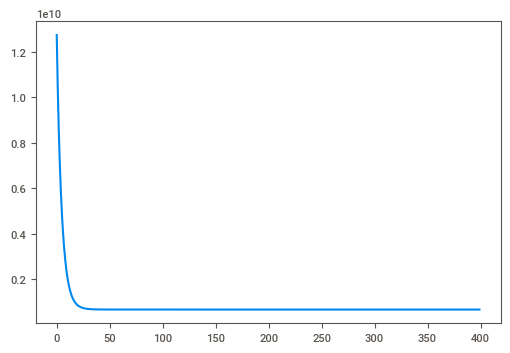

In [409]:
plt.plot(c)

In [410]:
def predict(x,w,b):
    return x.dot(w)+b

y_pred=predict(x_test,w,b)
y_pred

array([130841.5030188 , 142578.12667199, 165646.23429706, 234528.66703706,
       119545.5936978 , 135598.8360793 , 122564.91708941, 168348.47018152,
       188987.55593741, 118494.08815526, 115724.79640746, 131716.67913144,
       154265.8626484 , 154550.45598494, 142894.21468504, 211863.31532126,
       140878.28608344, 135732.46017984, 191332.71315037, 121293.88600999,
       233205.54542372, 144968.09665531, 211589.61467788, 167150.92760064,
       152229.11514881, 168959.03049519, 196906.22989684, 137411.8850022 ,
       122851.01201797, 174270.99838526, 215692.67226162, 139922.58721654,
       137960.16884064, 161994.44742188, 176296.49541301, 126791.16972939,
       192897.24494862, 163731.80463498, 166151.62353988, 196248.11434654,
       163255.25109087, 113376.74651993, 133644.34381113, 117707.6641111 ,
       164551.89422464, 223815.48616605, 200183.08399293, 184919.67345344,
       184833.53989144, 170559.99390091, 196301.6165636 , 203906.2578198 ,
       212239.62830055, 1

In [411]:
r2_score(y_test,y_pred)

0.5266438539050448